In [5]:
# Importamos funciones del futuro para compatibilidad con versiones antiguas de Python.
from __future__ import division, print_function

# Importamos las bibliotecas necesarias.
import numpy as np  # Para manejo de arreglos y cálculos numéricos.
import matplotlib.pyplot as plt  # Para visualización de gráficos.



# 🔹 Ensamblaje de la Matriz de Rigidez en 1D con Elementos Finitos

En el **Método de Elementos Finitos (FEM)** en una dimensión, la matriz de rigidez global se construye ensamblando contribuciones de cada **elemento finito** en la malla.

## 📌 Matriz de Rigidez Local

Para un **elemento finito** $ e $ definido en el intervalo $ [x_1, x_2] $, utilizamos funciones base **lineales** $ \varphi_1(x) $ y $ \varphi_2(x) $. La matriz de rigidez local se define como:

$$
A^e = \int_{x_1}^{x_2}  \frac{d\varphi_i}{dx} \frac{d\varphi_j}{dx} \,dx.
$$

Para elementos **uniformes** de tamaño $ h = x_2 - x_1 $, se obtiene:

$$
A^e = \frac{1}{h} 
\begin{bmatrix} 
1 & -1 \\ 
-1 & 1 
\end{bmatrix}.
$$

## 📌 Ensamblaje de la Matriz de Rigidez Global

Dado un conjunto de $ N $ nodos con coordenadas $ x_1, x_2, \dots, x_N $, los elementos finitos están formados por pares consecutivos de nodos.

La matriz de rigidez global $ K $ se obtiene **sumando las contribuciones** de cada elemento:

$$
A_{i,j} = \sum_{e} A^e_{i,j}.
$$

Donde $ i, j $ son los **índices globales** de los nodos del elemento $ e $.

### 🔷 Pasos del Ensamblaje:

1️⃣ **Inicializar** $ K $ como una matriz de ceros de tamaño $ N \times N $.  
2️⃣ Para **cada elemento** $ e $, calcular su **matriz de rigidez local** $ A^e $.  
3️⃣ **Sumar** los valores de $ A^e $ en las posiciones correspondientes de $ A $.

---

## 📌 Ejemplo de Ensamblaje

Si tenemos **3 nodos** y **2 elementos**, la matriz de rigidez global antes de aplicar condiciones de frontera es:

$$
A =
\begin{bmatrix}
\frac{1}{h} & -\frac{1}{h} & 0 \\
-\frac{1}{h} & \frac{2}{h} & -\frac{1}{h} \\
0 & -\frac{1}{h} & \frac{1}{h}
\end{bmatrix}.
$$


# 🔹 Ensamblaje del Vector del Lado Derecho en 1D con FEM

El **vector del lado derecho** (también conocido como **vector de carga** o **rhs - right-hand side**) representa la contribución de la función fuente en el **Método de Elementos Finitos (FEM)**.

---

## 📌 Definición del Vector de Carga

En la formulación débil del problema en **una dimensión (1D)**, el vector del lado derecho se obtiene integrando la función fuente $ f(x) $ contra las funciones base $ \varphi_j(x) $:

$$
b_j = \int_{\Omega} f(x) \varphi_j(x) \,dx.
$$

Donde:
- $ \Omega = [a, b] $ es el dominio del problema.
- $ f(x) $ es la **función fuente**.
- $ \varphi_j(x) $ son las **funciones base** utilizadas en la discretización FEM.

Para **elementos lineales** en 1D con nodos en $ x_i $ y $ x_{i+1} $, la contribución al vector de carga **por cada elemento** es:

$$
b^e =
\int_{x_i}^{x_{i+1}} f(x) 
\begin{bmatrix} 
\varphi_1(x) \\ 
\varphi_2(x)
\end{bmatrix} dx.
$$

Si usamos **funciones base lineales** en cada elemento, la aproximación más simple es tomar **cuadratura de punto medio**:

$$
b^e \approx f(x_{\text{medio}}) \cdot h
\begin{bmatrix} 
\frac{1}{2} \\ 
\frac{1}{2}
\end{bmatrix}.
$$

Donde:
- $ x_{\text{medio}} = \frac{x_i + x_{i+1}}{2} $ es el **punto medio del elemento**.
- $ h = x_{i+1} - x_i $ es el **tamaño del elemento**.

Cada **elemento** contribuye a dos nodos, sumándose en el **vector global**.

---

## 📌 Ensamblaje del Vector de Carga Global

Para construir el **vector global** $ b $, recorremos cada elemento y sumamos sus contribuciones en los nodos correspondientes:

$$
b_j = \sum_e b^e_j.
$$

El proceso es:

1️⃣ **Inicializar** el vector global $ b $ con ceros.  
2️⃣ **Para cada elemento** calcular su **vector local** $ b^e $.  
3️⃣ **Sumar** la contribución de $ b^e $ a los nodos correspondientes del **vector global**.

---

## 📌 Ejemplo de Vector de Carga en 3 Nodos

Si tenemos **3 nodos** y **2 elementos**, el vector de carga **antes de aplicar condiciones de frontera** es:

$$
b =
\begin{bmatrix}
b_1 \\
b_2 \\
b_3
\end{bmatrix}
=
\begin{bmatrix}
\frac{h}{2} f(x_1) \\
\frac{h}{2} f(x_2) + \frac{h}{2} f(x_2) \\
\frac{h}{2} f(x_3)
\end{bmatrix}.
$$

Después de aplicar **condiciones de frontera**, eliminamos las filas correspondientes a los **nodos fijos**.

---

✅ **Resumen**:  
El **vector de carga** se obtiene 


In [7]:

# Definimos la función para resolver un problema 1D con el Método de Elementos Finitos (FEM).
def FEM1D(coords, source):
    """
    Implementa el Método de Elementos Finitos (FEM) en 1D para resolver una ecuación diferencial.

    Parámetros:
    coords : array-like
        Coordenadas de los nodos en la malla.
    source : función
        Función fuente del problema, que se evaluará en los nodos.

    Retorna:
    stiff : ndarray
        Matriz de rigidez ensamblada.
    rhs : ndarray
        Vector de términos fuente (lado derecho del sistema de ecuaciones).
    """
    
    # Número total de nodos en la malla.
    N = len(coords)

    # Matriz de rigidez local del elemento (para un elemento lineal en 1D).
    stiff_loc = np.array([[1.0, -1.0], 
                          [-1.0,1.0]])
    
    # Lista de elementos finitos: cada uno contiene dos nodos consecutivos.
    eles = [np.array([cont, cont + 1]) for cont in range(0, N - 1)]

    # Inicializamos la matriz de rigidez global y el vector de términos fuente.
    stiff = np.zeros((N, N))  # Matriz de rigidez global (N x N).
    rhs = np.zeros(N)  # Vector del lado derecho (rhs - right-hand side).

    # Ensamblaje de la matriz de rigidez global y el vector fuente.
    for ele in eles:
        # Cálculo del Jacobiano del elemento (tamaño del elemento en 1D).
        hi = coords[ele[1]] - coords[ele[0]]

        # Ensamblaje de la matriz de rigidez global.
        for cont1, row in enumerate(ele):  # Recorre los índices de fila.
            for cont2, col in enumerate(ele):  # Recorre los índices de columna.
                stiff[row, col] = stiff[row, col] + stiff_loc[cont1, cont2] / hi
        
        middlepoint = (coords[ele[1]] + coords[ele[0]])/2
        # Contribución de la función fuente a los nodos del elemento.
        rhs[ele] = rhs[ele] + source(middlepoint)*hi/2

    return stiff, rhs


# 🔹 Método de Soluciones Manufacturadas en FEM

El **Método de Soluciones Manufacturadas (MMS - Method of Manufactured Solutions)** es una técnica utilizada para **verificar** la implementación numérica de un método, como el **Método de Elementos Finitos (FEM)**.

---

## 📌 ¿Qué es una Solución Manufacturada?

Una **solución manufacturada** es una función **suavemente diferenciable** que se elige artificialmente como **solución exacta** de una ecuación diferencial, permitiendo la verificación de la implementación numérica.

**Pasos para aplicar el MMS:**

1️⃣ **Definir una función** $ u_{\text{exacta}}(x) $ como solución exacta.  
2️⃣ **Calcular** los términos diferenciales para encontrar la ecuación asociada.  
3️⃣ **Reformular** la ecuación con un término fuente fabricado $ f(x) $.  
4️⃣ **Comparar la solución numérica** obtenida con FEM contra la solución exacta.


In [28]:
# Definimos el número de nodos en la malla.
N = 20

# U_exacta = xp*(xp**4 - 1)/20

# Definimos la función fuente \( f(x) = x^3 \).
fun = lambda x: x**3

# Generamos una malla uniforme en el intervalo [0,1].
x = np.linspace(0, 1, N+1)

# Llamamos a la función FEM1D para obtener la matriz de rigidez y el vector fuente.
stiff, rhs = FEM1D(x, fun)

h = 1/(N)
print(1/h)
print(stiff)
print(rhs)




20.0
[[ 20. -20.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.]
 [-20.  40. -20.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.]
 [  0. -20.  40. -20.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.]
 [  0.   0. -20.  40. -20.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0. -20.  40. -20.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0. -20.  40. -20.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0. -20.  40. -20.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0. -20.  40. -20.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0. -20.  40. -20.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.]
 [  0

In [29]:
# Inicializamos el vector solución.
sol = np.zeros(N+1)

# Resolvemos el sistema lineal ignorando las condiciones de frontera (se asumen Dirichlet en los extremos).
sol[1:-1] = np.linalg.solve(stiff[1:-1, 1:-1], -rhs[1:-1])

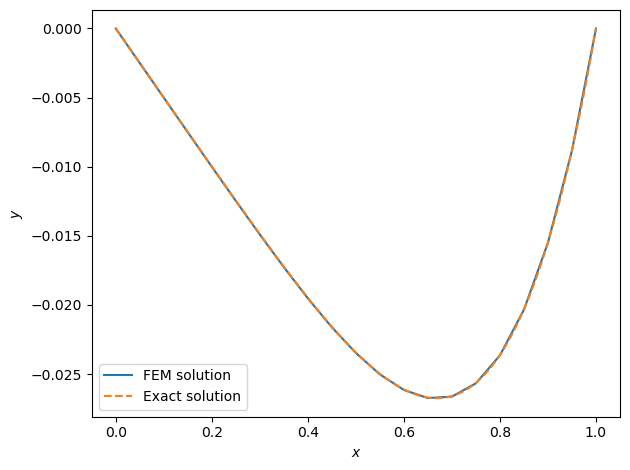

In [30]:
#%% Visualización de los resultados
plt.figure  # Define el tamaño del gráfico.

plt.plot(x, sol)  # Grafica la solución obtenida por FEM.

xp = np.linspace(0, 1, 1000)
plt.plot(xp, xp*(xp**4 - 1)/20, linestyle="dashed")  # Solución exacta para comparación.

plt.xlabel(r"$x$")  # Etiqueta del eje x.
plt.ylabel(r"$y$")  # Etiqueta del eje y.
plt.legend(["FEM solution", "Exact solution"])  # Agrega una leyenda al gráfico.
plt.tight_layout()  # Ajusta automáticamente los márgenes del gráfico.
plt.show()  # Muestra el gráfico.